<a href="https://colab.research.google.com/github/sibot89/Deep-Learning/blob/main/MNIST_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [2]:
(X_train, _), (X_test,_) = mnist.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)

X_train.shape, X_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 784), (10000, 784))

In [3]:
input_img = Input(shape=(784,))

encoder = Dense(units=32, activation='relu')(input_img)
decoder = Dense(units=784, activation='sigmoid')(encoder)

In [4]:
auto_encoder = Model(input_img, decoder)
auto_encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
auto_encoder.fit(X_train, X_train,
                 epochs=30,
                 batch_size=256)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3818
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1825
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1510
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1321
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1207
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1132
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1077
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1032
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0997
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0976
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0963
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0956
Epoch 13/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0949
Epoch 14/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0944
Epoch 15/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [7]:
encoder_model = Model(input_img, encoder)
encoder_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
pred = auto_encoder.predict(X_test)
encoded_images = encoder_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


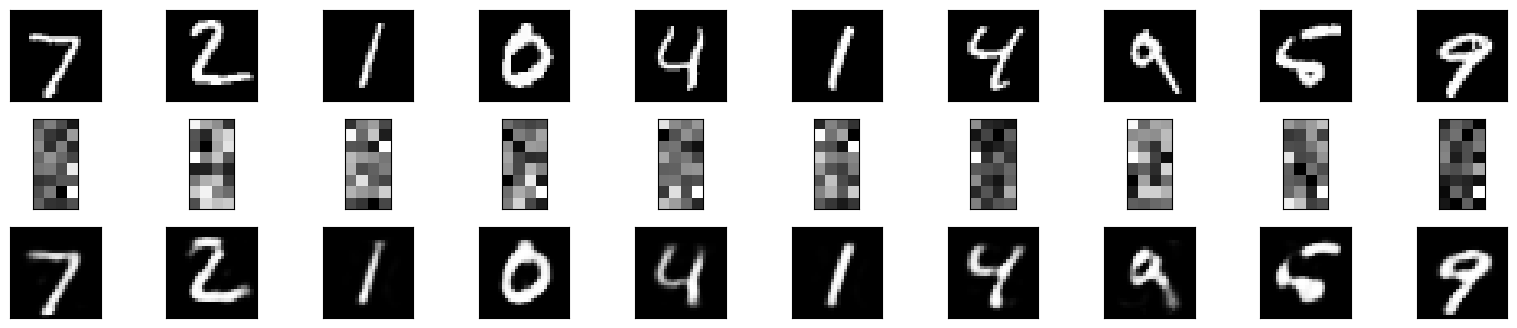

In [12]:
plt.figure(figsize=(40, 4))
for i in range(10):
  ax = plt.subplot(3, 20, i + 1)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, 20, i + 1 + 20)
  plt.imshow(encoded_images[i].reshape(8, 4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, 20, i + 1 + 20 * 2)
  plt.imshow(pred[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()